# Visualizing the Explanations

### Setting the config file path

In [16]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/home/coder/gretel'

In [17]:
from src.evaluation.evaluator_manager import EvaluatorManager

config_file_path = module_path + '/examples/config/config_trisqr_trisqr_custom_oracle_dce.json'
output_file_path = module_path + '/examples/output/triangles_squares_custom_oracle/DCESearchExplainer/results_run-0.json'
output_folder = module_path + '/examples/output/'
stats_folder = module_path + '/examples/stats/'

# Verifying that the paths are valid
(os.path.isfile(config_file_path), os.path.isfile(output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

(True, True, True, True)

### Creating the Evaluator Manager

In [18]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

### Visualizing the results

Showing the json file with the output

In [19]:
with open(output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "trisqr", "parameters": {"n_inst": 80}}, "oracle": {"name": "trisqr_custom_oracle", "parameters": {"embedder": {"name": "graph2vec", "parameters": {}}}}, "explainer": {"name": "dce_search", "parameters": {"graph_distance": {"name": "graph_edit_distance", "parameters": {}}}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [0.0008065700531005859, 0.0005841255187988281, 0.0005342960357666016, 0.0005202293395996094, 0.0009076595306396484, 0.0006539821624755859, 0.0005407333374023438, 0.0009913444519042969, 0.0006079673767089844, 0.0005807876586914062, 0.0005276203155517578, 0.0005199909210205078, 0.0005061626434326172, 0.0006566047668457031, 0.0009162425994873047, 0.0007920265197753906, 0.0006377696990966797, 0.0006299

Creating a table with the results

In [20]:
from src.data_analysis.data_analyzer import DataAnalyzer
import pandas as pd

dtan = DataAnalyzer(output_folder, stats_folder)
dtan.aggregate_data()
dtan.aggregate_runs()
dtan.create_tables_by_oracle_dataset()

results_table = pd.read_csv(stats_folder + 'trisqr-trisqr_custom_oracle.csv')
results_table

,Unnamed: 0,explainer,runtime,runtime-std,Graph_Edit_Distance,Graph_Edit_Distance-std,Oracle_Calls,Oracle_Calls-std,Correctness,Correctness-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Oracle_Accuracy,Oracle_Accuracy-std
0,0,dce_search,0.00065,0.0,4.0,0.0,81.0,0.0,1.0,0.0,0.583333,0.0,1.0,0.0,1.0,0.0


### Analizing a Counterfactual Explanation

In [21]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]
# Obtain the for each data instance its counterfactual explanation
inst_exp_list = ev.get_instance_explanation_pairs()
# Take the first pair instance-explanation as an example
inst, exp = inst_exp_list[2]

Visualizing the labels of each instance and their counterfactuals against the ground truth

In [22]:
ev.get_instance_and_counterfactual_classifications()

[{'instance_id': 78,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 0},
 {'instance_id': 1,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 0},
 {'instance_id': 79,
  'ground_truth_label': 0,
  'instance_label': 0,
  'counterfactual_label': 1},
 {'instance_id': 3,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 0},
 {'instance_id': 4,
  'ground_truth_label': 0,
  'instance_label': 0,
  'counterfactual_label': 1},
 {'instance_id': 5,
  'ground_truth_label': 0,
  'instance_label': 0,
  'counterfactual_label': 1},
 {'instance_id': 6,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 0},
 {'instance_id': 7,
  'ground_truth_label': 0,
  'instance_label': 0,
  'counterfactual_label': 1},
 {'instance_id': 8,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 0},
 {'instance_id': 9,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 0}

Showing the steps to get the counterfactual

In [23]:
# Printing the steps needed to obtain the counterfactual
cf_actions = dtan.get_counterfactual_actions(inst, exp)
for act, el in cf_actions.items():
    print(act, el)

Remove Nodes [3]
Remove Edges [(3, 2), (0, 3)]
Add Nodes []
Add Edges [(0, 2)]


Visualizing the original instance

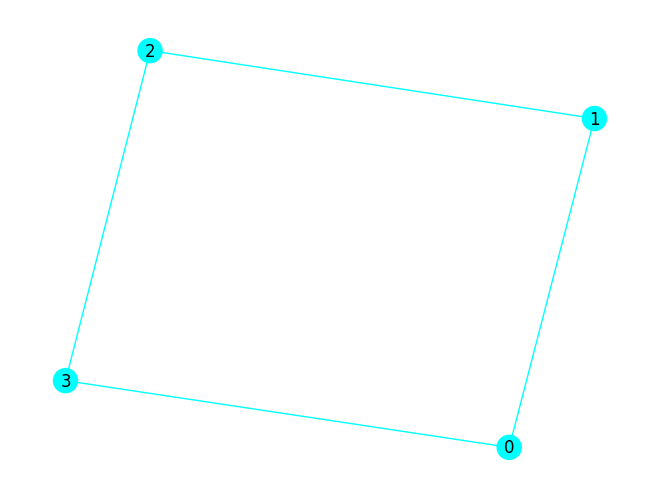

In [25]:
dtan.draw_graph(inst, layout='spring')

Visualizing the changes in the counterfactual

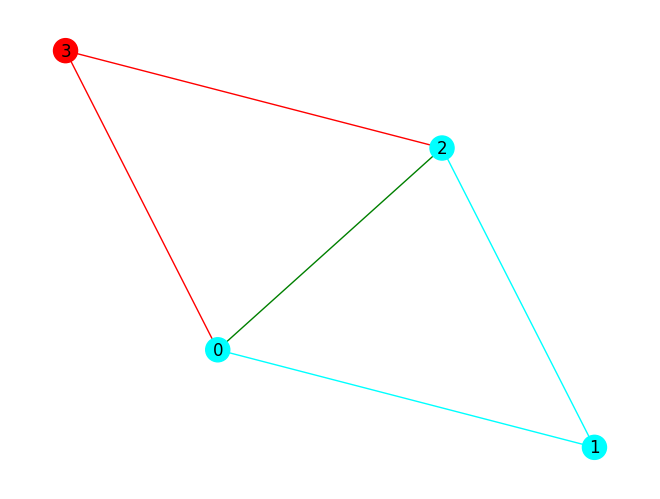

In [26]:
dtan.draw_counterfactual_actions(inst, exp, layout='spring')

The blue elements reamain unchanged between the original instance and the counterfactual, the red ones were removed in the conterfactual example, and the green ones were added.